# Dataset loading

In [ ]:
# Upgrade kagglehub to the latest version
!pip install --upgrade kagglehub

In [2]:
import kagglehub
import os

# Download dataset

path = kagglehub.dataset_download("noir1112/customer-satisfaction-and-demographics-dataset")

print("Path to dataset files:", path)
# List files inside
print(os.listdir(path))


100%|██████████| 12.4k/12.4k [00:00<00:00, 17.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/noir1112/customer-satisfaction-and-demographics-dataset/versions/1
['customer_satisfaction_data.csv']


In [3]:
import pandas as pd
import os
import kagglehub

# Download dataset

# Assuming the main file is 'Customer-survey-data.csv' based on the file listing
file_path = os.path.join(path, "customer_satisfaction_data.csv")

df = pd.read_csv(file_path)

# Show first 5 rows
print("shape is :",df.shape)
print("the first 5 rows of dataset\n")
print(df.head())
df.info()

shape is : (1050, 8)
the first 5 rows of dataset

  Customer ID Product Category  Satisfaction Score  Days for Delivery  \
0    CUST0022      Electronics                 7.0                8.0   
1         NaN            Books                 NaN                3.0   
2    CUST0748       Home Goods                 8.0                6.0   
3    CUST0244      Electronics                 9.0                7.0   
4    CUST0684            Books                 NaN                7.0   

  Customer Service Interaction  Purchase Amount  Customer Age  Gender  
0                           No            89.71           NaN       M  
1                            Y           178.39          52.0  Female  
2                           no            81.71          33.0   Other  
3                          Yes            83.18          46.0   Other  
4                          Yes            68.80          36.0    Male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data 

# Data Exploration and Understanding

In [4]:
df = df.rename(columns={
    'Customer ID': 'customer_id',
    'Product Category': 'product_category',
    'Satisfaction Score': 'CSI',  # target
    'Days for Delivery': 'days_delivery',
    'Customer Service Interaction': 'customer_service',
    'Purchase Amount': 'purchase_amount',
    'Customer Age': 'customer_age',
    'Gender': 'gender'
})


In [5]:
# Check dataset shape & column info
print("Shape:", df.shape)   # Rows, columns
print("Columns:", df.columns.tolist())
print(df.dtypes)            # Data types


Shape: (1050, 8)
Columns: ['customer_id', 'product_category', 'CSI', 'days_delivery', 'customer_service', 'purchase_amount', 'customer_age', 'gender']
customer_id          object
product_category     object
CSI                 float64
days_delivery       float64
customer_service     object
purchase_amount     float64
customer_age        float64
gender               object
dtype: object


In [6]:
# Missing values analysis
print(df.isnull().sum())

customer_id          52
product_category     59
CSI                  52
days_delivery        65
customer_service    205
purchase_amount      51
customer_age         40
gender              212
dtype: int64


In [7]:
# Basic statistics
print(df.describe())

              CSI  days_delivery  purchase_amount  customer_age
count  998.000000     985.000000       999.000000   1010.000000
mean     7.087174       5.091371       319.617157     35.203960
std      2.002360       1.994346      1747.522478     14.644312
min      1.000000      -1.000000         0.000000      0.000000
25%      6.000000       4.000000        65.915000     26.000000
50%      7.000000       5.000000        99.450000     34.000000
75%      8.000000       6.000000       135.810000     45.000000
max     12.000000      11.000000     21751.000000     77.000000


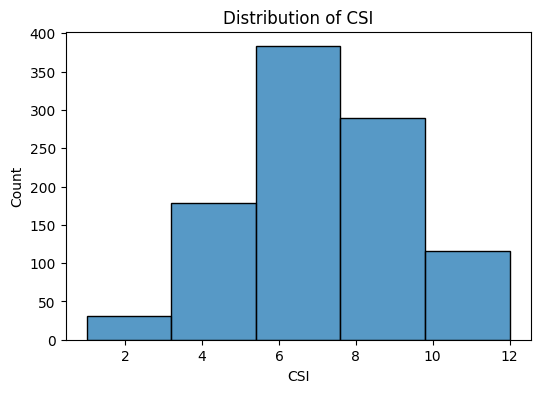

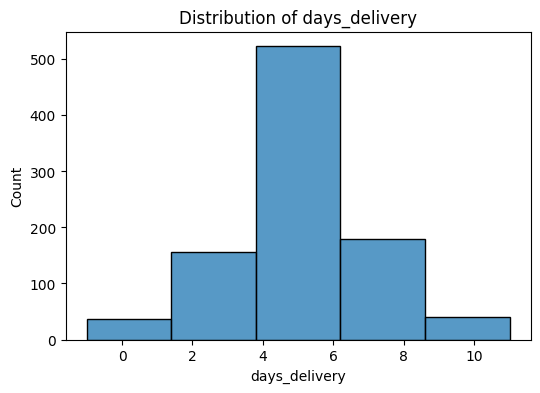

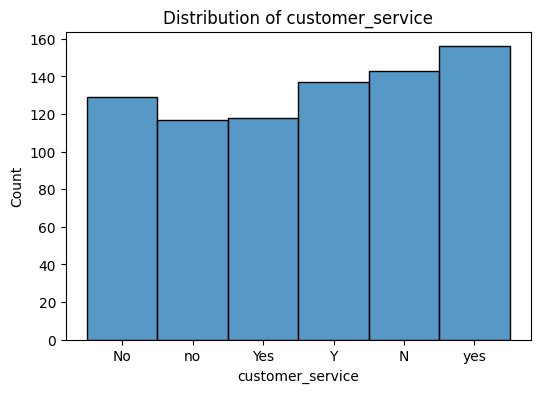

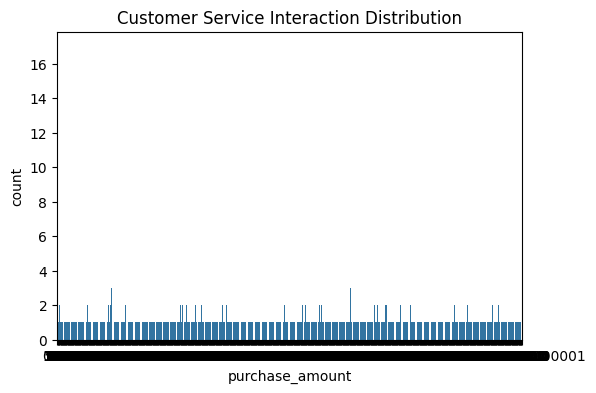

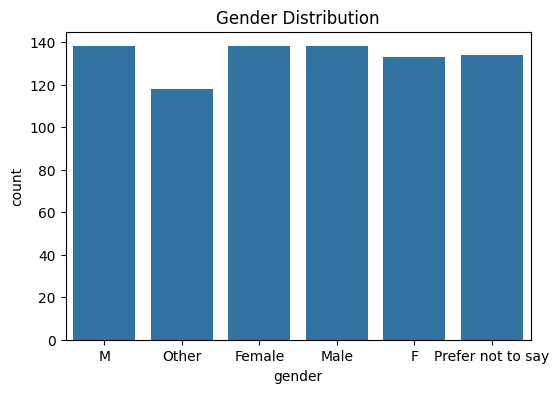

In [14]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distributions
rating_cols = df.columns[1:4]  # first three rating columns
for col in rating_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=5, kde=False)
    plt.title(f"Distribution of {col}")
    plt.show()

# Order Accuracy (Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(x=df[df.columns[4]])
plt.title("Customer Service Interaction Distribution")
plt.show()

# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['gender'])
plt.title("Gender Distribution")
plt.show()

# Data preprocessing

In [47]:
# Missing values analysis
print(df.isnull().sum())

CSI                             0
days_delivery                   0
customer_service                0
purchase_amount                 0
customer_age                    0
product_category_Clothing       0
product_category_Electronics    0
product_category_Home Goods     0
gender_male                     0
gender_other                    0
gender_prefer not to say        0
dtype: int64


In [ ]:
# Drop customer_id (not needed)
df.drop(columns=['customer_id'], inplace=True)

# Drop rows with NaN in target
df = df.dropna(subset=['CSI'])

In [ ]:
# Fill numerical columns
num_cols = ['days_delivery', 'purchase_amount', 'customer_age']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# Normalize customer_service_interaction
df['customer_service'] = df['customer_service'].str.strip().str.lower()
df['customer_service'] = df['customer_service'].replace({
    'yes': 'yes', 'y': 'yes',
    'no': 'no', 'n': 'no'
})

# Normalize gender
df['gender'] = df['gender'].str.strip().str.lower()
df['gender'] = df['gender'].replace({
    'm': 'male', 'f': 'female'
})


In [ ]:
# Fill categorical columns
cat_cols = ['product_category', 'customer_service', 'gender']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Encode Categorical Features
df['customer_service'] = df['customer_service'].map({'yes': 1, 'no': 0})

df = pd.get_dummies(df, columns=['product_category', 'gender'], drop_first=True)


# Exploratory Data Analysis (EDA)

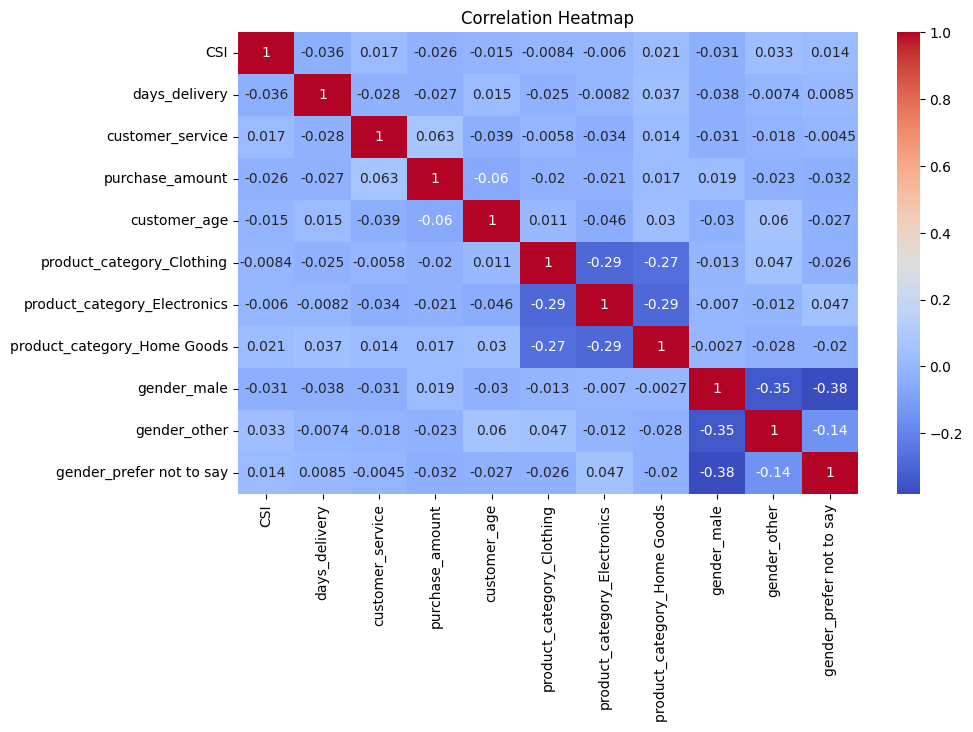

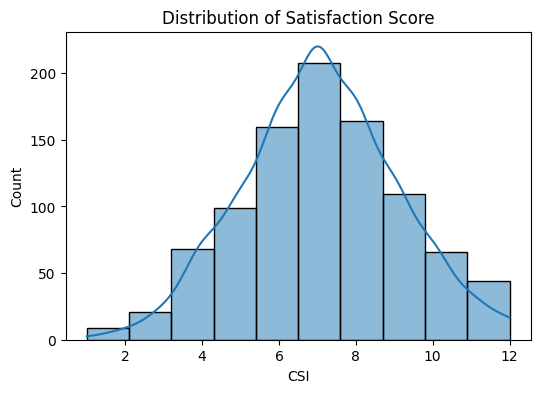

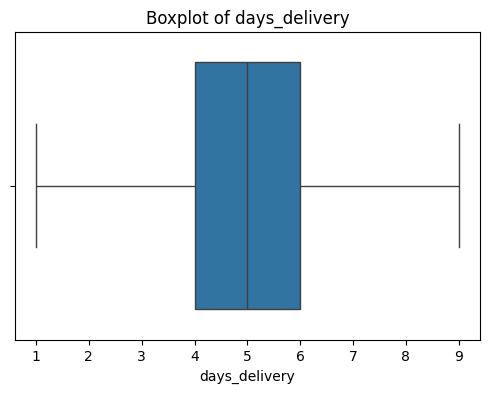

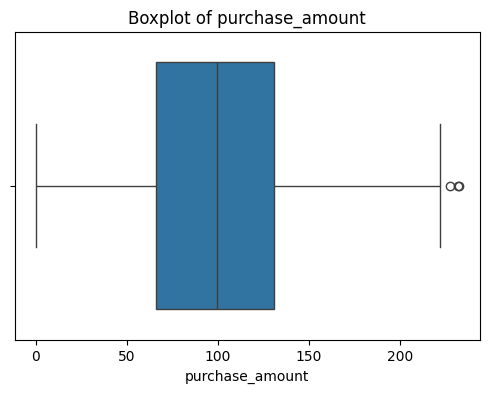

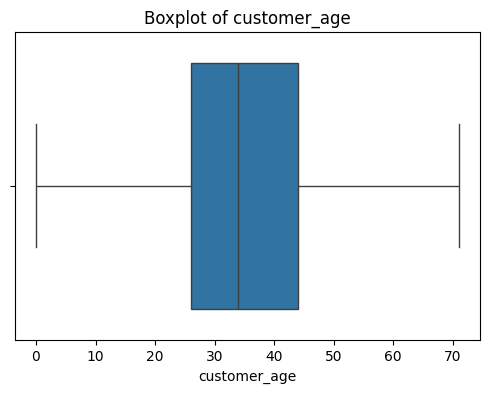

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of satisfaction_score
plt.figure(figsize=(6,4))
sns.histplot(df['CSI'], bins=10, kde=True)
plt.title("Distribution of Satisfaction Score")
plt.show()

# Boxplot for numerical features
num_cols = ['days_delivery', 'purchase_amount', 'customer_age']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [37]:
# Function to count outliers using IQR
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

# Count outliers for numerical columns
num_cols = ['days_delivery', 'purchase_amount', 'customer_age']
outlier_counts = {}
for col in num_cols:
    outlier_counts[col] = count_outliers_iqr(df, col)

print("Number of outliers (based on IQR):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Number of outliers (based on IQR):
days_delivery: 22
purchase_amount: 23
customer_age: 7


In [38]:
# Remove outliers using IQR
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_cleaned

# Remove outliers from numerical columns
num_cols = ['days_delivery', 'purchase_amount', 'customer_age']
df_cleaned = df.copy() # Create a copy to avoid modifying the original DataFrame directly
for col in num_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print("Shape of the DataFrame before removing outliers:", df.shape)
print("Shape of the DataFrame after removing outliers:", df_cleaned.shape)

df = df_cleaned # Update the main DataFrame to the cleaned version

Shape of the DataFrame before removing outliers: (998, 11)
Shape of the DataFrame after removing outliers: (948, 11)


In [ ]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped = df.copy()
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Cap outliers for numerical columns
num_cols = ['days_delivery', 'purchase_amount', 'customer_age']
df_capped = df.copy() # Create a copy to avoid modifying the original DataFrame directly
for col in num_cols:
    df_capped = cap_outliers_iqr(df_capped, col)

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after capping outliers:", df_capped.shape)

# You can now use df_capped for further analysis or modeling
# To see the effect of capping, you could compare descriptive statistics or boxplots
# Example: print(df['purchase_amount'].describe())
# Example: print(df_capped['purchase_amount'].describe())

In [39]:
print(df['purchase_amount'].describe())

count    948.000000
mean      99.193977
std       46.875713
min        0.000000
25%       66.127500
50%       99.675000
75%      130.500000
max      232.250000
Name: purchase_amount, dtype: float64


# feature engineering

In [55]:
import numpy as np
import pandas as pd

# Copy dataset to avoid overwriting
df_fe = df.copy()

# 1. Delivery-based features
df_fe['is_late_delivery'] = (df_fe['days_delivery'] > 5).astype(int)
df_fe['fast_delivery'] = (df_fe['days_delivery'] <= 2).astype(int)

# 2. Customer service quality
df_fe['good_service'] = (df_fe['customer_service'] >= 4).astype(int)
df_fe['poor_service'] = (df_fe['customer_service'] <= 2).astype(int)

# 3. Purchase amount transformation
df_fe['log_purchase'] = np.log1p(df_fe['purchase_amount'])  # log transform

# 4. Age buckets
df_fe['age_group'] = pd.cut(
    df_fe['customer_age'],
    bins=[0, 25, 40, 60, 100],
    labels=['<25', '25-40', '40-60', '60+']
)

# One-hot encode age_group
df_fe = pd.get_dummies(df_fe, columns=['age_group'], drop_first=True)

# 5. Interaction feature
df_fe['delivery_service_interaction'] = df_fe['days_delivery'] * df_fe['customer_service']

df = df_fe

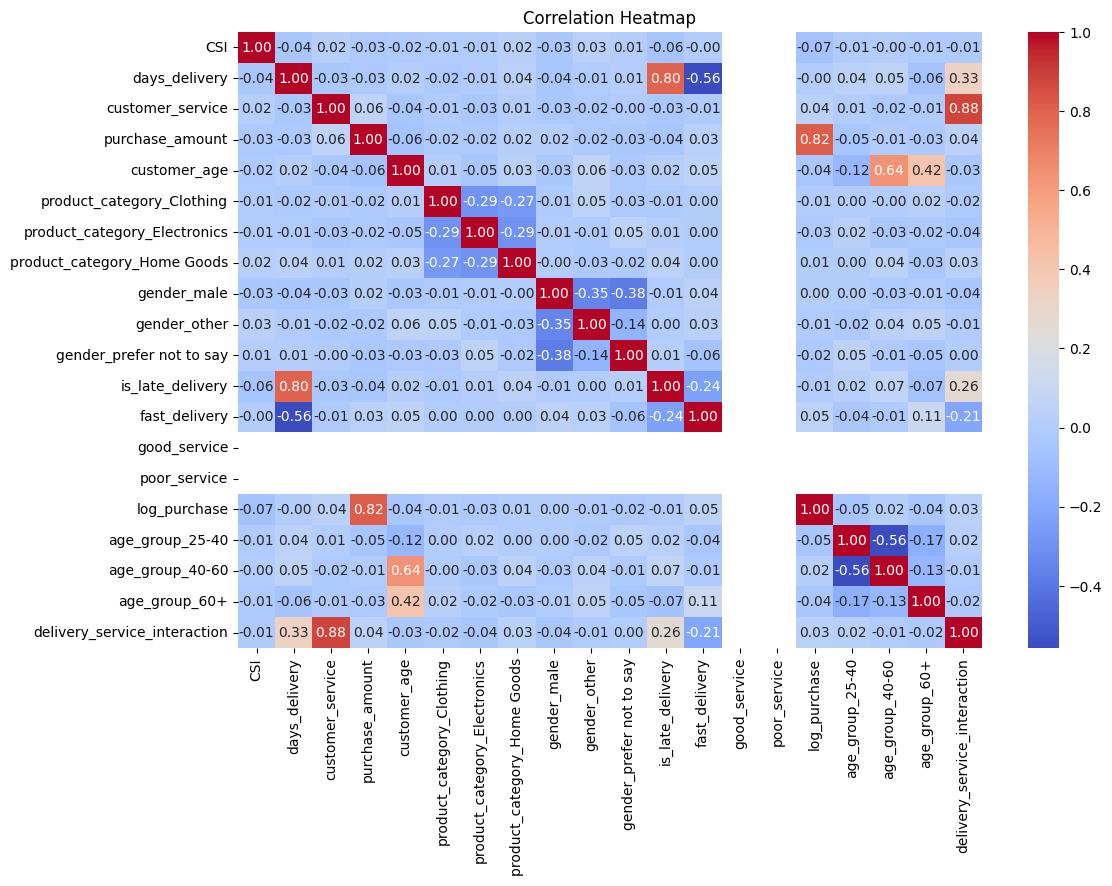

In [62]:
# Correlation heatmap
plt.figure(figsize=(12, 8))  # Increased figure size
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f") # Added fmt for better annotation formatting
plt.title("Correlation Heatmap")
plt.show()

#

# Model Building

In [63]:
df.head()

,CSI,days_delivery,customer_service,purchase_amount,customer_age,product_category_Clothing,product_category_Electronics,product_category_Home Goods,gender_male,gender_other,gender_prefer not to say,is_late_delivery,fast_delivery,good_service,poor_service,log_purchase,age_group_25-40,age_group_40-60,age_group_60+,delivery_service_interaction
0,7.0,8.0,0,89.71,34.0,False,True,False,True,False,False,1,0,0,1,4.507668,True,False,False,0.0
2,8.0,6.0,0,81.71,33.0,False,False,True,False,True,False,1,0,0,1,4.415341,True,False,False,0.0
3,9.0,7.0,1,83.18,46.0,False,True,False,False,True,False,1,0,0,1,4.432957,False,True,False,7.0
5,5.0,1.0,1,211.03,33.0,False,True,False,False,False,False,0,1,0,1,5.356728,True,False,False,1.0
6,6.0,3.0,0,159.02,51.0,False,False,False,True,False,False,0,0,0,1,5.075299,False,True,False,0.0


In [56]:
from sklearn.model_selection import train_test_split

# Target
y = df['CSI']

# Features (all except CSI)
X = df.drop(columns=['CSI'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


X shape: (948, 19)
y shape: (948,)
Train size: (758, 19) Test size: (190, 19)


In [65]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# -------------------
# Define features & target
# -------------------
X = df.drop(columns=['CSI'])
y = df['CSI']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------
# Random Forest
# -------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

# -------------------
# XGBoost
# -------------------
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

# -------------------
# Compare Results
# -------------------
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "MAE": [rf_mae, xgb_mae],
    "RMSE": [rf_rmse, xgb_rmse],
    "R²": [rf_r2, xgb_r2]
})

print("Model Comparison:\n")
print(results)


Model Comparison:

           Model       MAE      RMSE        R²
0  Random Forest  1.435211  1.872011 -0.022872
1        XGBoost  1.580106  2.017818 -0.188416


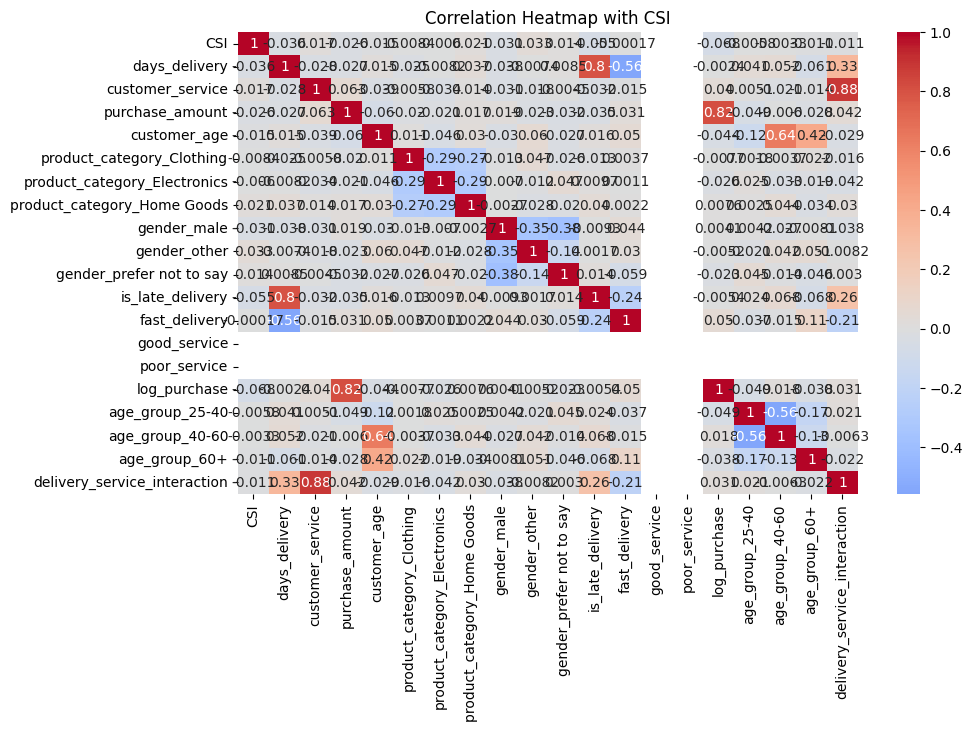

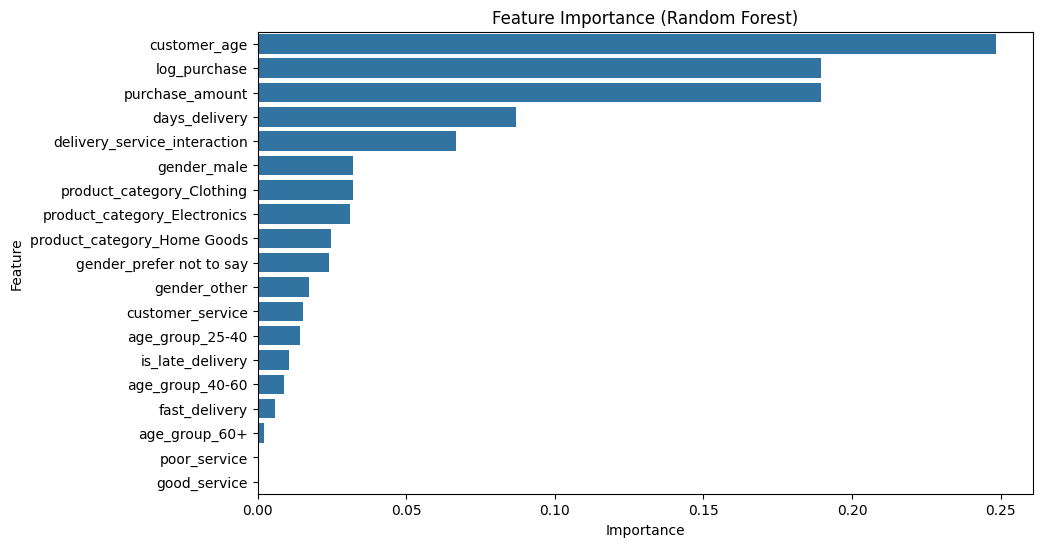

                         Feature  Importance
3                   customer_age    0.248319
14                  log_purchase    0.189603
2                purchase_amount    0.189472
0                  days_delivery    0.086791
18  delivery_service_interaction    0.066876
7                    gender_male    0.032261
4      product_category_Clothing    0.032121
5   product_category_Electronics    0.031081
6    product_category_Home Goods    0.024638
9       gender_prefer not to say    0.024031
8                   gender_other    0.017347
1               customer_service    0.015425
15               age_group_25-40    0.014214
10              is_late_delivery    0.010755
16               age_group_40-60    0.008938
11                 fast_delivery    0.005960
17                 age_group_60+    0.002167
13                  poor_service    0.000000
12                  good_service    0.000000


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Correlation heatmap (only numeric features + CSI)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap with CSI")
plt.show()

# Feature importance using Random Forest
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['CSI'])
y = df['CSI']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title("Feature Importance (Random Forest)")
plt.show()

print(importance)


In [67]:
# Save the cleaned DataFrame to a CSV file
cleaned_file_path = "cleaned_customer_satisfaction_data.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned DataFrame saved to: {cleaned_file_path}")

# Instructions to download:
# 1. Open the file explorer on the left sidebar in Colab (folder icon).
# 2. Find 'cleaned_customer_satisfaction_data.csv' in the current directory.
# 3. Right-click on the file and select "Download".

Cleaned DataFrame saved to: cleaned_customer_satisfaction_data.csv
